# Intro to AI-driven Science on Supercomputers

## Week 6 Homework

#### Dan Horner (danhorner@berkeley.edu)
---

# Distributed Training

*NOTE: Due to unexplained issues with the my compute environment, I was unable to complete all of the runs to compare; I was not able to run with more than 2 GPUs.*

*This notebook presents the results for the run I was able accomplish. I worked with Kyle Gerard Felker on Slack to try to diagnose my issue.*

Link to my script [tensorflow2_mnist_hvd.py](../06_distributedTraining/homework/tensorflow2_mnist_hvd.py).

When I ran using 1 or 2 GPUs, my code seemed to work fine: metrics.dat was generated fine and the [output](../06_distributedTraining/homework/homework-run-2.txt) looked good. However, when I run using 4 or more GPUs (regardless of thetagpu compute node, nor any of a host of suggestions from ALCF staff and other class participants) my code consistently crashed. Here is a link to the [output](../06_distributedTraining/homework/homework-crash-4.txt) that was printed when it failed.


## MNIST Training on ThetaGPU

Inside the Session 6 homework folder [link](../06_distributedTrainin/homework/') I modified the original training script [tensorflow2_mnist_hvd.py](../06_distributedTraining/homework/tensorflow2_mnist_hvd.py) to use Hovorod parallel training. I ran it on ThetaGPU using 1, 2, 4, 8, and 16 GPUs. (*NOTE: I only was able to run with 1 and 2 GPUs*)


    mpirun -n 1 python tensorflow2_mnist_hvd.py
    mpirun -n 2 python tensorflow2_mnist_hvd.py
etc ...
    
After each run, I saved the `metrics.dat` output for plotting below. 

### Timing

The overall timings are presented in the table below:

|n GPU | Training Time (s), each node|
|:---:|:---|
| 1 | 30.0 |
| 2 | 28.2|
|| 25.2 |
| 4 | - |
| 8 | - |
| 16 | - |



## Model Training Performance Charts

### Set Up

In [1]:
import numpy as np
import pandas as pd

# Plotting library
import plotnine as p9
from plotnine import * 
p9.options.figure_size = (15, 12)

log_path = '../06_distributedTraining/homework/'
log_files = [log_path + 'metrics1.dat', log_path + 'metrics2.dat']


### Helper function for plotting

In [2]:
# In order to keep consistency and avoid too much copy-paste of the same plotting set-up, 
# I use a small function that makes each plot
def base_plot(df, n):
    pl = (ggplot()
      + geom_hline(yintercept = 0, colour = 'grey', size = 0.3)
      + geom_vline(xintercept = 0, colour = 'grey', size = 0.3)
      + geom_line(df, aes(x = 'step', y = 'value', colour = 'variable'), size = 0.7)
      + geom_point(df, aes(x = 'step', y = 'value', colour = 'variable'), fill = 'white', size = 1.5, alpha = 0.7)
      + scale_x_continuous(name = 'training step', breaks = np.arange(0, 20, 4), minor_breaks = 3)
      + scale_y_continuous(name = '', breaks = np.arange(0, 1.1, 0.2))
      + scale_colour_manual(name = ' ', values = {'Training Accuracy': 'blue', 'Validation Accuracy': 'red'})    
      + ggtitle('Training and Validation Accuracy (' + str(n) + ' GPU)')
      + theme(
          dpi = 300,
          title = element_text(ha = 'left'),
          legend_position = (0.30, 0.25),
      )
     )
    return(pl)


### Read in and parse the job output, creating a pandas DataFrame holding the values

In [3]:
li = []
for f in log_files:
    df_tmp = pd.read_table(f, sep = ' ', header = None, names = ['Training Accuracy', 'train_loss', 'Validation Accuracy', 'valid_loss', 'time_per_epochs'])
    df_tmp['n_gpu'] = int(f.split('.')[-2][-1])
    df_tmp['step'] = df_tmp.index
    li.append(df_tmp)
df = pd.concat(li)
df

,Training Accuracy,train_loss,Validation Accuracy,valid_loss,time_per_epochs,n_gpu,step
0,0.964844,0.121343,0.982372,0.051531,6.203821,1,0
1,0.988281,0.054595,0.986779,0.041556,1.555292,1,1
2,0.980469,0.047903,0.986478,0.044129,1.549638,1,2
3,0.980469,0.056086,0.987680,0.039252,1.548544,1,3
4,0.988281,0.028226,0.987079,0.040154,1.554202,1,4
5,0.992188,0.025859,0.989183,0.042132,1.550733,1,5
6,0.980469,0.067914,0.987981,0.042188,1.558077,1,6
7,0.976562,0.067558,0.988882,0.039090,1.570491,1,7
8,0.984375,0.046532,0.989683,0.034366,1.550525,1,8
9,0.988281,0.037686,0.988882,0.040838,1.550511,1,9


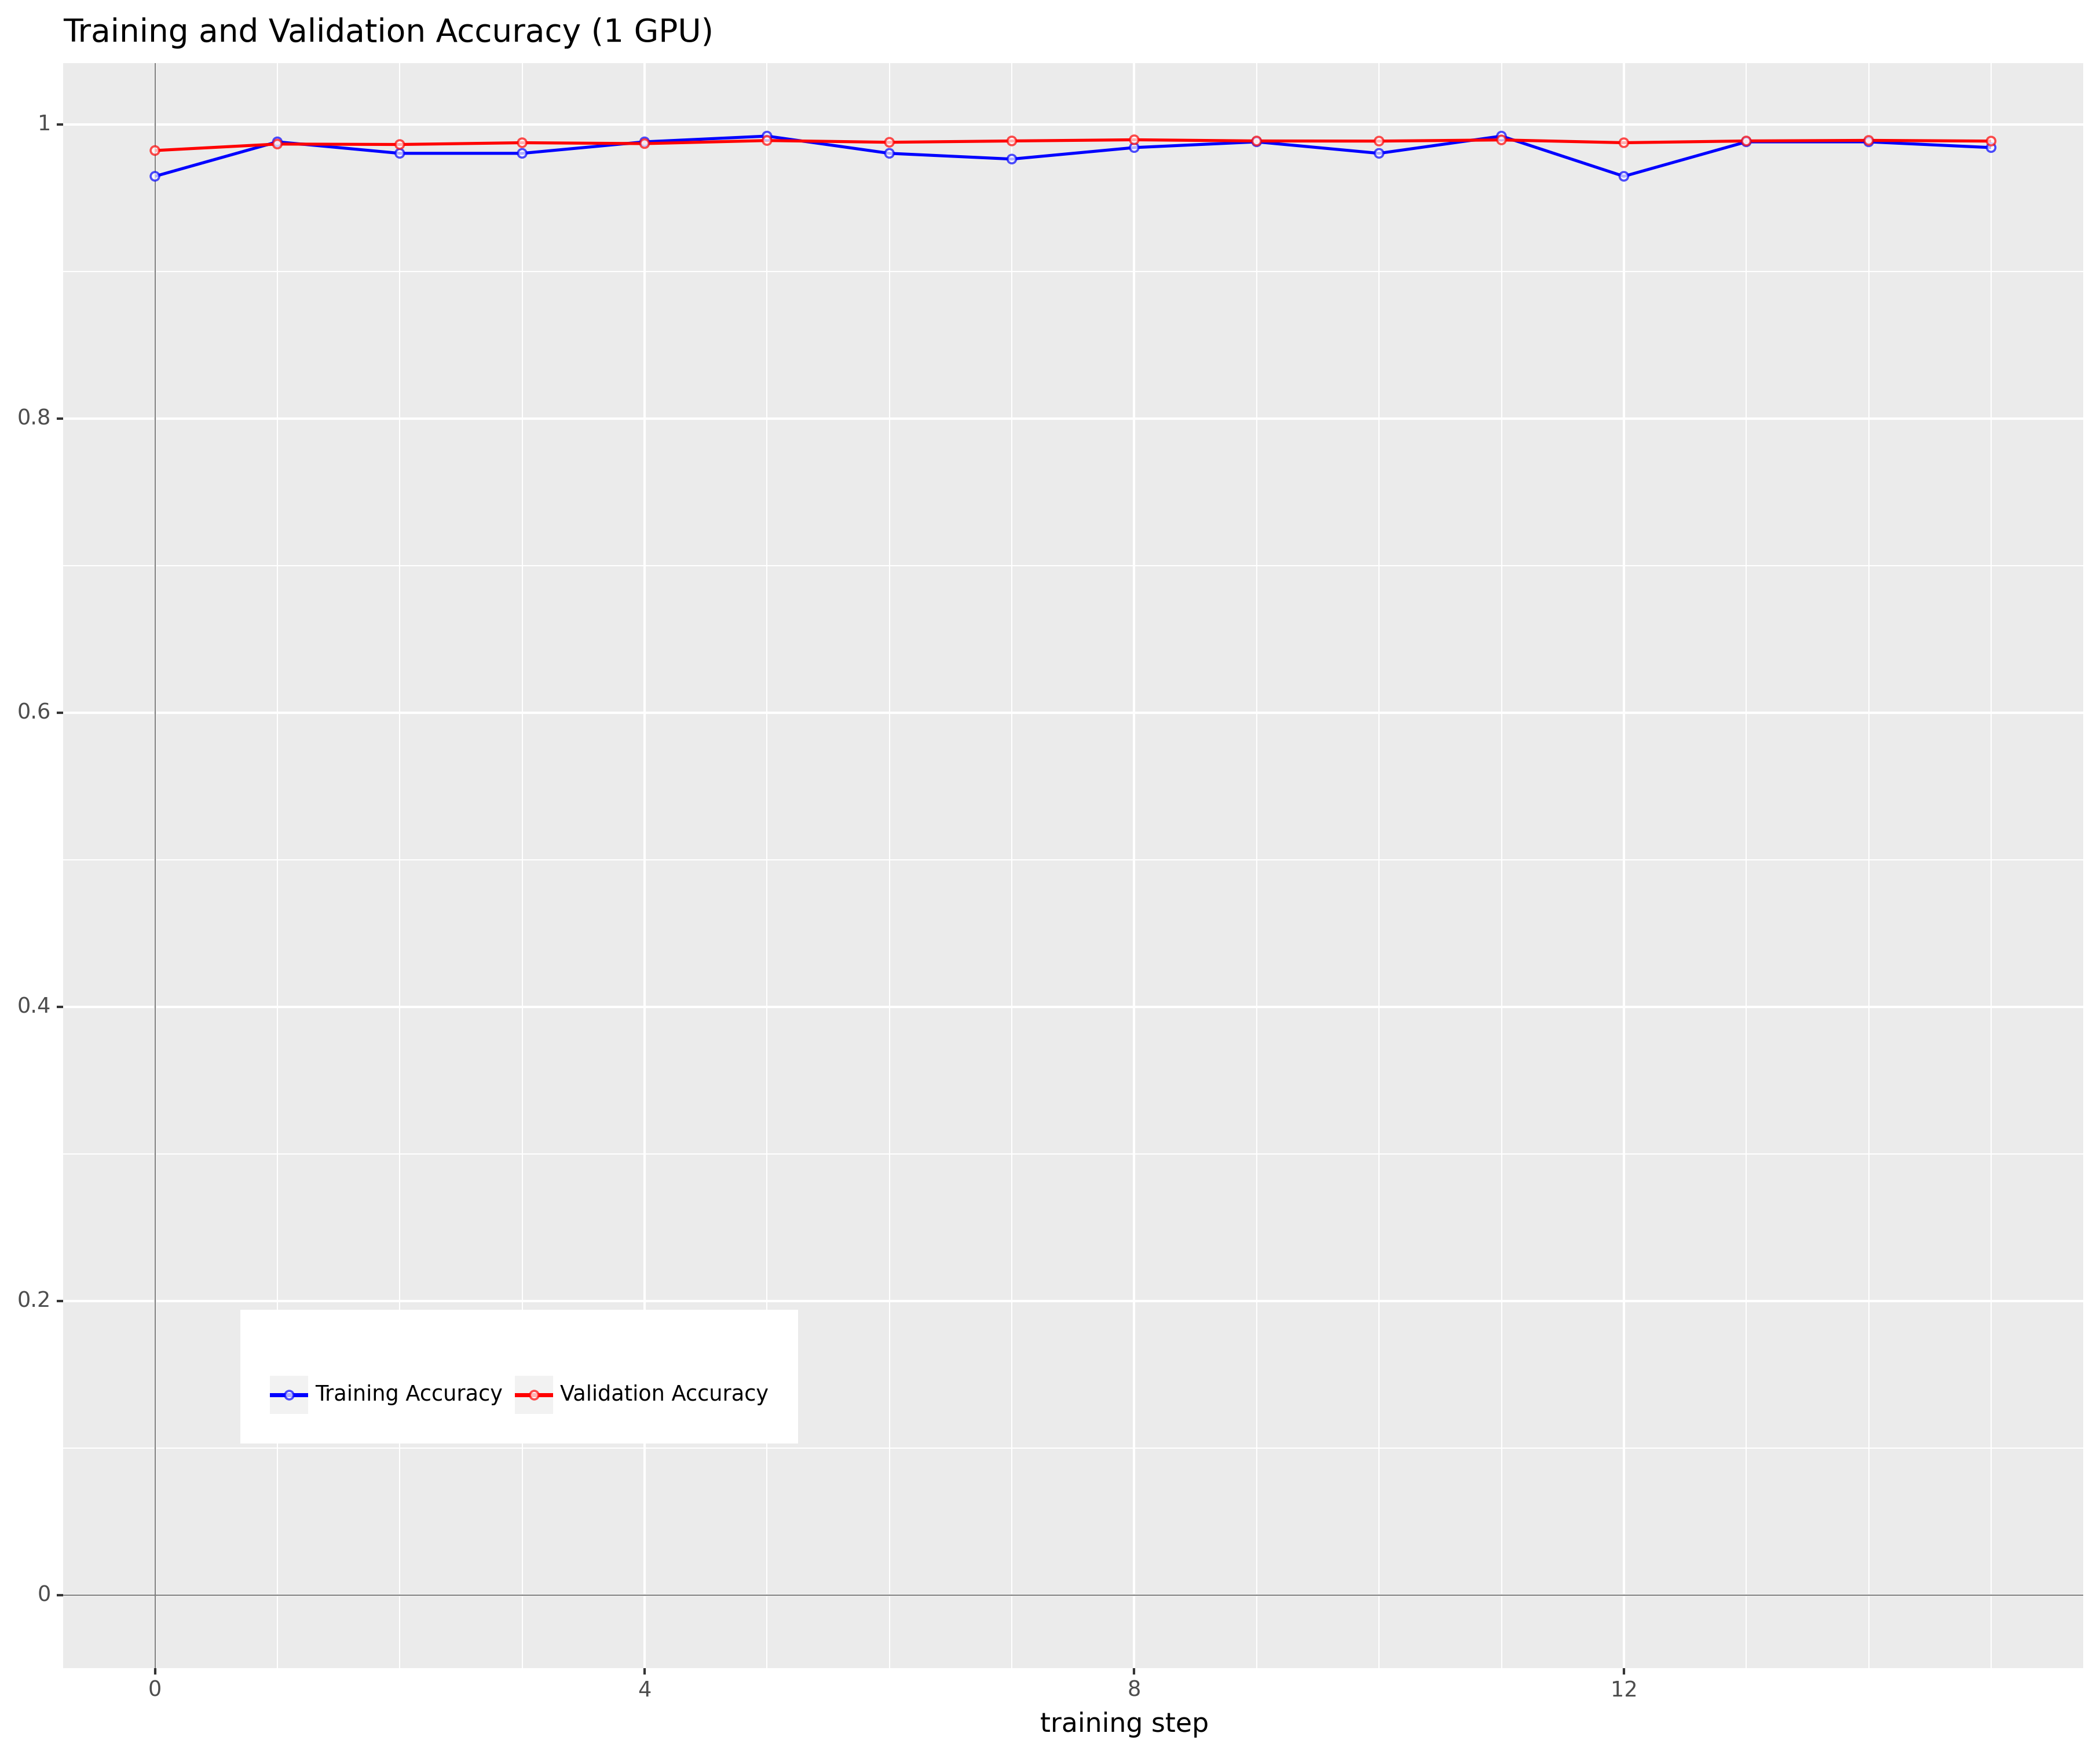

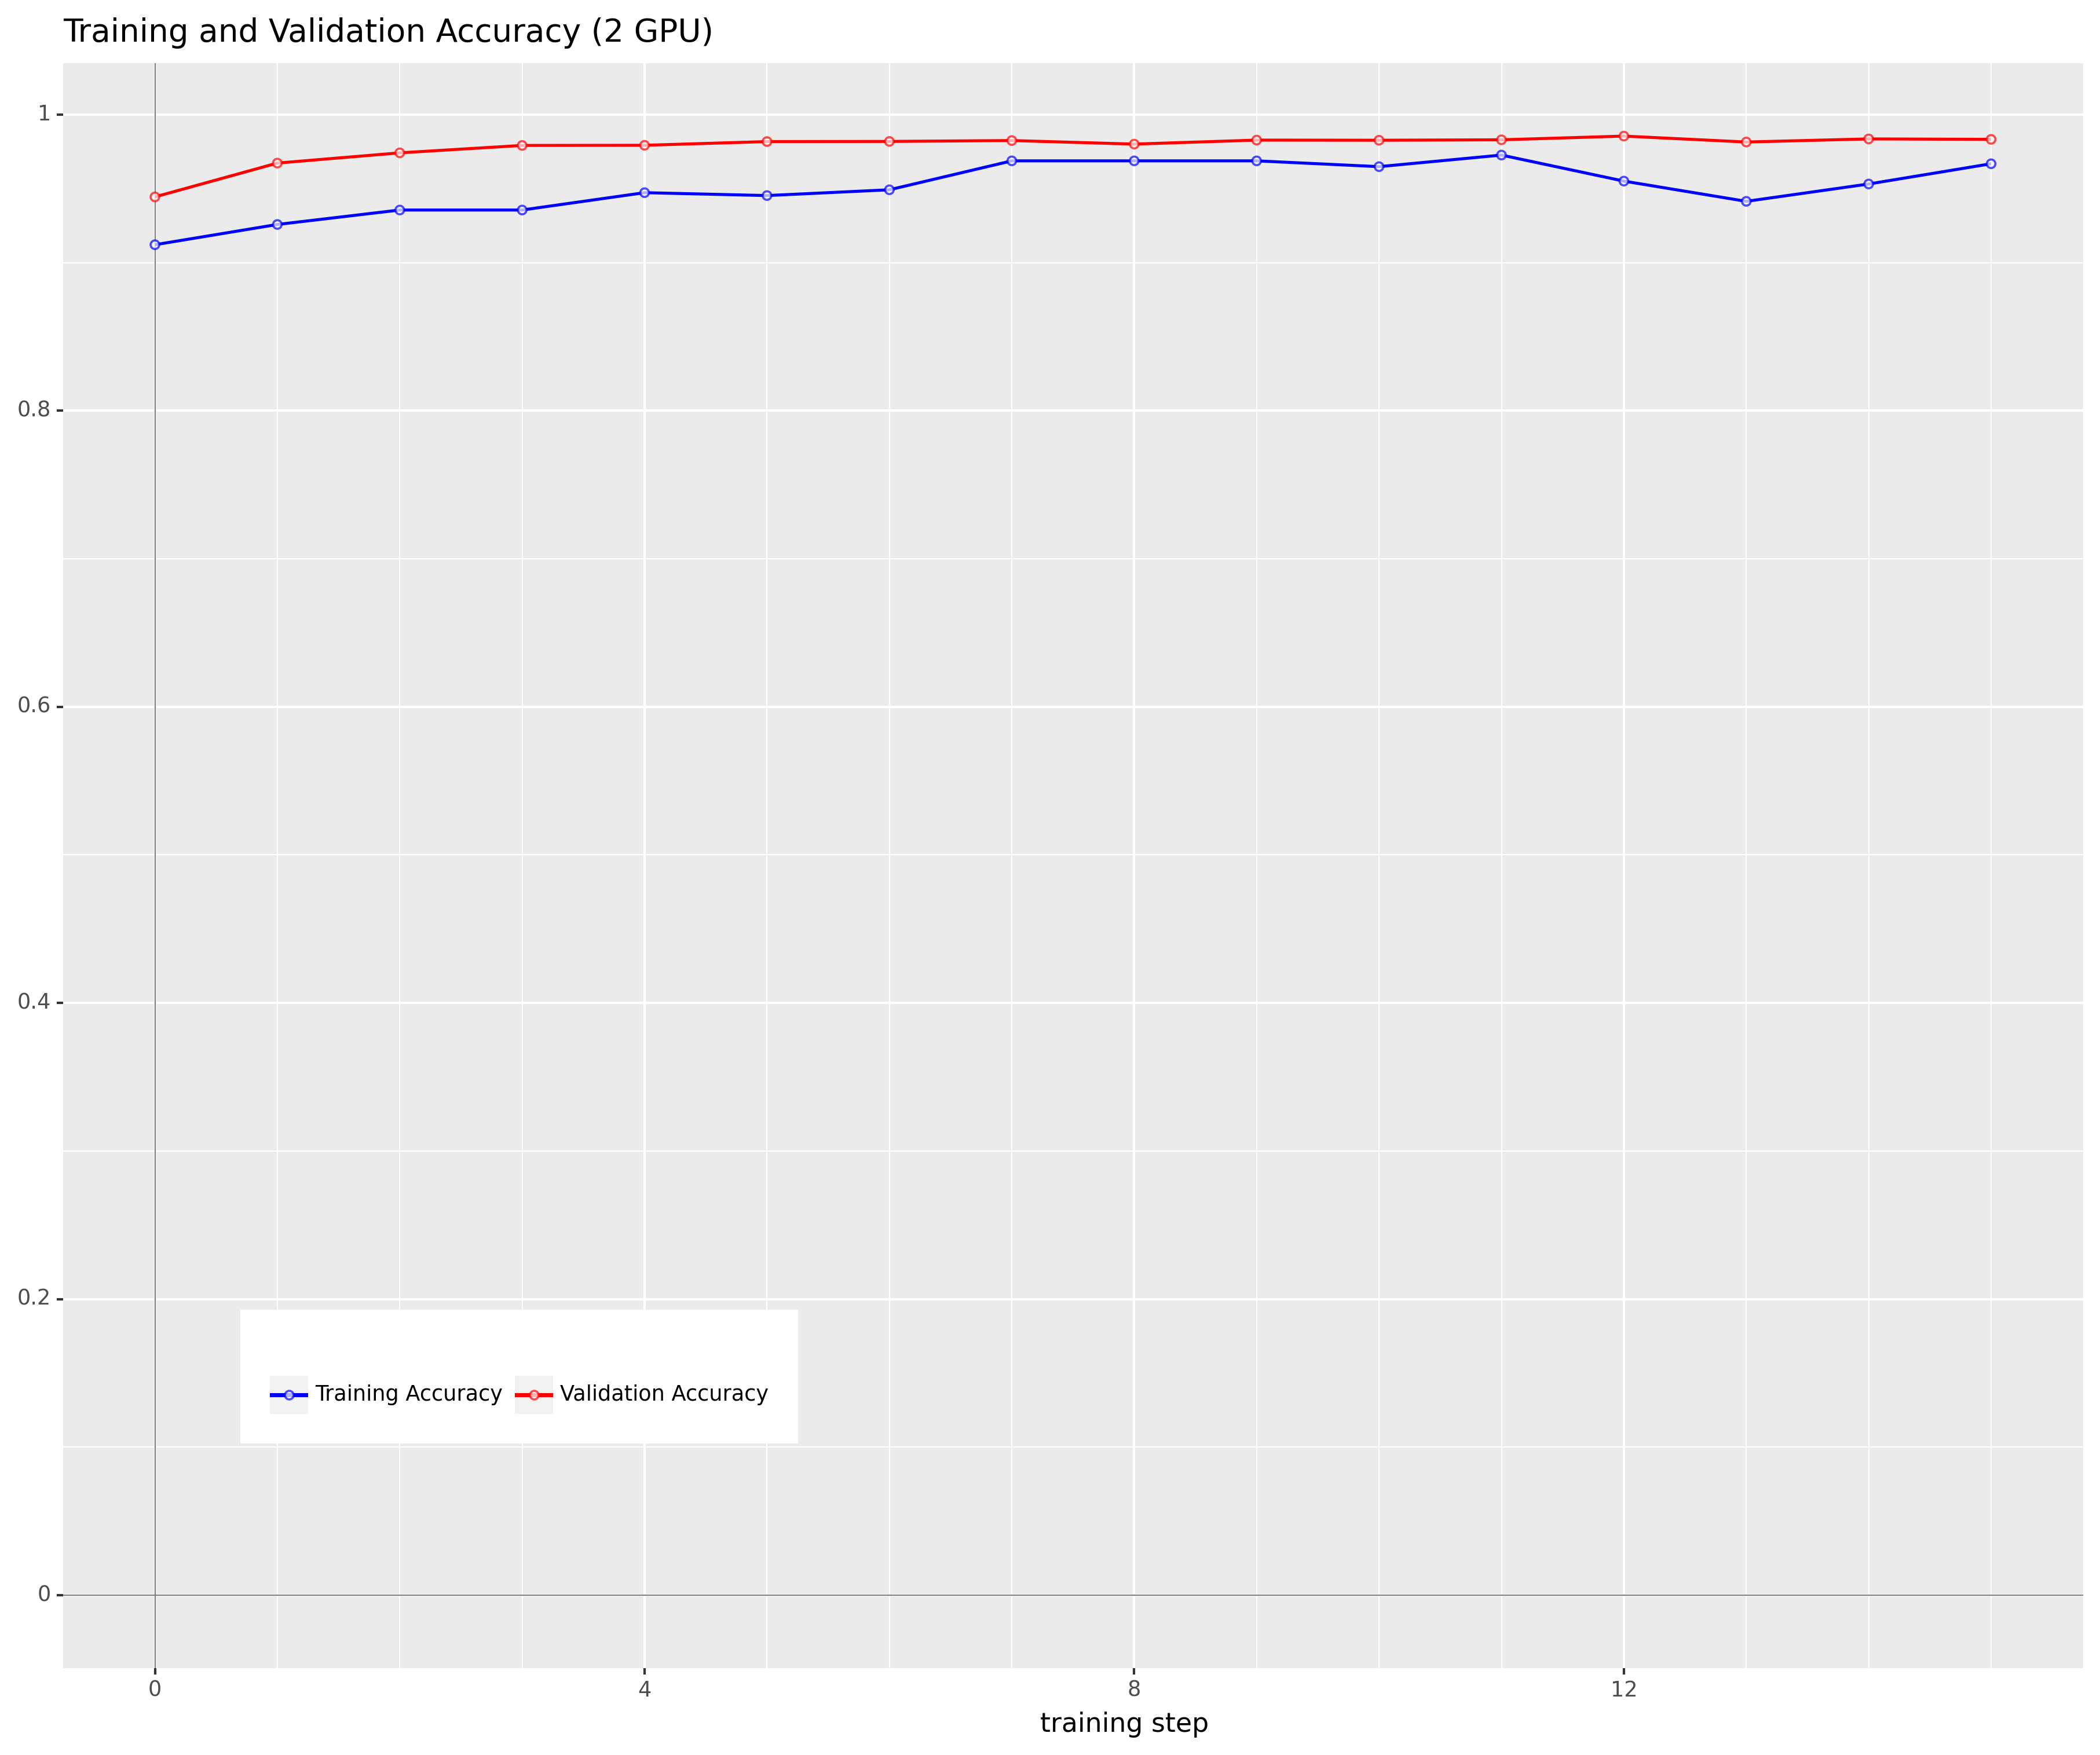

In [4]:
for n, df_n in df.groupby(['n_gpu']):
    df_pl = df_n.melt(id_vars = ['step'], value_vars=['Training Accuracy', 'Validation Accuracy',])
    pl = base_plot(df_pl, n)
    print(pl)                